# Let's think about mass balance
Amanda Manaster  
*2019.07.15*  

---
When a truck passes, two processes occur: **crushing and pumping**.  
    &emsp;*Crushing* creates more fine sediment in the existing sediment matrix by breaking down larger particles.  
    &emsp;*Pumping* makes fine sediment available for transport (i.e., adds the fine sediment to the fines storage layer). 

We can think of the total storage as:  
$S=S_{f}+S_{m}$  

$S_f$= fines storage term (i.e., what’s available for transport?)  
$S_m$= matrix storage term; combination of fines ($S_{m_f}$), coarse particles ($S_{m_c}$) 


And the mass balance as:  
$dS = -q_{s_{out}}$  

$dS$ = total change in storage  
$q_{s_{out}}$ = sediment leaving the road prism

---
## **Fines storage term:**  
$S_{f_{i+1}} = S_{f_{i}} + dS_{f_{i}}$  

*Initial condition:*  
&emsp;$S_{f_{0}} = 0$

### After truck passes/storms: 
   &emsp;<u>Condition 1:</u>    
   &emsp;Amount of available sediment is *greater than* the sediment transport capacity.  
       &emsp;&emsp;$q_{s_{out}} = q_s*t_s$  
       &emsp;&emsp;$dS_{f_{i}} = u*t_p*L - q_{s_{out}}$  
   &emsp;<u>Condition 2:</u>   
   &emsp;Amount of available sediment is *less than* the sediment transport capacity.  
       &emsp;&emsp;$q_{s_{out}} = min(u*t_p*L + S_{f_i}, q_s*t_s)$  
       &emsp;&emsp;$ dS_{f_i} = u*t_p*L - q_{s_{out}}$    

where:  
    &emsp;$u$ = pumping of fines w/ each truck pass; $0.005 mm$  
    &emsp;$t_p$ = # of truck passes  
    &emsp;$L$ = representative length of road in $m$  
    &emsp;$q_s$ = mean rate of sediment transport during a storm, assuming steady-state runoff in $m^2/s$  
    &emsp;$t_s$ = storm duration in $s$  
    
--- 
## Matrix storage term: 
$S_{m_{i+1}} = S_{m_{i}} + dS_{m_{i}}$  

*Initial condition:*  
&emsp;$S_{m_0}=S_{m_{f_0}}+S_{m_{g_0}}$  
&emsp;$S_{m_{f_0}}=t_{m_0}\ast f_{m_{f_0}}\ast\left(1-p_{m}\right)$   
&emsp;$S_{m_{c_0}}=t_{m_0}\ast f_{m_{c_0}}\ast\left(1-p_{m}\right)$  
      
where:   
    &emsp;$t_{m_0}$ = thickness of sediment matrix in $m$  
    &emsp;$f_{m_{f_0}}$ = initial fraction of fines in matrix [-]   
    &emsp;$f_{m_{c_0}}$ = initial fraction of larger particles in matrix [-]  
    &emsp;$p_{m}$ = porosity of sediment mixture in the matrix  

### After truck passes:   
$dS_{m_i} = dS_{m_{c_i}} + dS_{m_{f_i}}$  
$dS_{m_{c_i}}=-k\ast S_{m_{c_i}}*t_{p_i}$     
$dS_{m_{f_i}}=k\ast S_{m_{c_i}}*t_{p_i}–(dS_{f_i}+q_{s_{out}})$ 

where:  
$k$ = crushing constant [-]

---
## More equations
#### Gover's equation (Istanbulluoglu et al. 2002):  
$q_s = \frac{10^{-4.348}}{(\rho_s*d_{50}^{0.811})}*(\tau-\tau_c)^{2.457}$  
where:  
    &emsp;$\rho_s$ = density of sediment; $2650 kg/m^3$  
    &emsp;$d_{50}$ = median grain size of fines  
    &emsp;$\tau$ = shear stress    
    &emsp;$\tau_c$ = critical shear stress      

*Note: This equation is calibrated for sediments that are between 0.058 and 1.098 mm.*  

#### More variable definitions:    
   &emsp;$\rho_w$ = density of water; $1000 kg/m^3$  
   &emsp;$g$ = gravity; $9.81 m/s^2$  
   &emsp;$H$ = depth of water  
   &emsp;$S$ = slope  
   &emsp;$r$ = runoff rate in $m/s$  

---
## An illustration:
<img src="capture1.png" width="375" align="left"/>
<img src="Capture.png" width="375" align="left" />  

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [2]:
L = 3.66
month = []
depth = []
rainfall = []
t = []
len_s = []
truck_pass = []

model_end = 52560 #hours

In [3]:
np.random.seed(1)
time = 0
while time < model_end:
    truck = 0
    T_b = np.random.exponential(72)
    T_r = np.random.exponential(0.85)
    r = np.random.exponential(30)
    
    while (r<10) or (r>100):
        r = np.random.exponential(30)
    
    if T_b/24 >= 1:
        day = int(T_b/24)
        for num in range(0, day):
            truck += np.random.randint(0,10)
    else:
        truck = np.random.randint(0,5)
    
    len_s.append(T_r)
    depth.append(r*T_r)
    rainfall.append(r)
    t.append(time)
    truck_pass.append(truck)
    
    time += T_b + T_r

In [4]:
df = pd.DataFrame()

df['time'] = t
df['day'] = np.divide(t,24).astype('int64')
df['storm_depth'] = depth
df['rainfall_rate'] = rainfall
df['storm_length'] = len_s
df['truck_pass'] = truck_pass

day0 = datetime(2018, 10, 1)
df.set_index(pd.DatetimeIndex([day0+timedelta(hours=time) for time in df.time]), inplace=True)

df.head()

,time,day,storm_depth,rainfall_rate,storm_length,truck_pass
2018-10-01 00:00:00.000000,0.000000,0,11.696884,10.800383,1.083006,0
2018-10-02 15:56:04.656292,39.934627,1,2.228388,12.719294,0.175197,1
2018-10-02 23:05:07.666605,47.085463,1,16.014891,34.676391,0.461838,6
2018-10-05 07:16:20.658723,103.272405,4,33.649366,48.395031,0.695306,9
2018-10-06 22:51:15.360342,142.854267,5,1.813292,21.903831,0.082784,17


In [5]:
df2 = df.resample('D').mean().fillna(0)
df2['day'] = np.arange(0, len(df2), 1)
df2.tail()

,time,day,storm_depth,rainfall_rate,storm_length,truck_pass
2024-09-18,52306.546350,2179,6.916254,13.468594,0.513510,17.0
2024-09-19,0.000000,2180,0.000000,0.000000,0.000000,0.0
2024-09-20,0.000000,2181,0.000000,0.000000,0.000000,0.0
2024-09-21,0.000000,2182,0.000000,0.000000,0.000000,0.0
2024-09-22,52404.867404,2183,18.826539,38.952241,0.356891,42.0


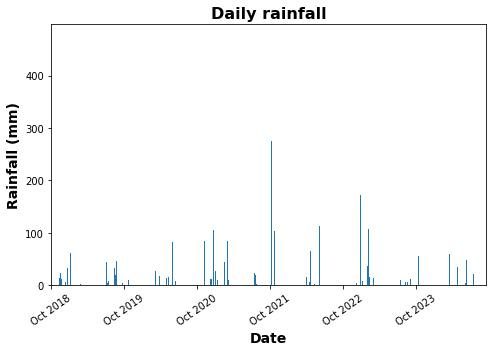

In [6]:
ticklabels = [item.strftime('%b %Y') for item in df2.index[::366]]
fig, ax = plt.subplots(figsize=(7,5))
df2.plot.bar(y='storm_depth', ax=ax, legend=False)
plt.xlabel('Date', fontweight='bold', fontsize=14)
plt.ylabel('Rainfall (mm)', fontweight='bold', fontsize=14)
plt.title('Daily rainfall', fontweight='bold', fontsize=16)
plt.xticks(np.arange(0,366*len(ticklabels),366), ticklabels, rotation=35)
plt.tight_layout()
#plt.savefig(r'C:\Users\Amanda\Desktop\Rainfall.png', dpi=300)
plt.show()

In [7]:
rho_w = 1000 #kg/m^3
rho_s = 2650 #kg/m^3
g = 9.81 #m/s^2
S = 0.058
tau_c = 0.110 #N/m^2; assuming d50 is approx. 0.0625 mm; value from https://pubs.usgs.gov/sir/2008/5093/table7.html
d50 = 6.25e-5 #m
u = 5.0e-6 #m
n = 0.02 #approx Manning's n value for overland flow

H = ((n*df.rainfall_rate*2.77778e-7*L)/S**(1/2))**(3/5)

df['shear_stress'] = rho_w*g*(H)*S

In [8]:
df['q_s'] = ((10**(-4.348))/(rho_s*d50**(0.811)))*(df.shear_stress-tau_c)**(2.457)
df.fillna(0, inplace=True)

df.head()

,time,day,storm_depth,rainfall_rate,storm_length,truck_pass,shear_stress,q_s
2018-10-01 00:00:00.000000,0.000000,0,11.696884,10.800383,1.083006,0,0.135225,5.147551e-09
2018-10-02 15:56:04.656292,39.934627,1,2.228388,12.719294,0.175197,1,0.149167,1.517370e-08
2018-10-02 23:05:07.666605,47.085463,1,16.014891,34.676391,0.461838,6,0.272279,4.987818e-07
2018-10-05 07:16:20.658723,103.272405,4,33.649366,48.395031,0.695306,9,0.332563,1.083900e-06
2018-10-06 22:51:15.360342,142.854267,5,1.813292,21.903831,0.082784,17,0.206684,1.397357e-07


In [9]:
df3 = df.resample('D').mean().fillna(0)
df3['day'] = np.arange(0, len(df3), 1)

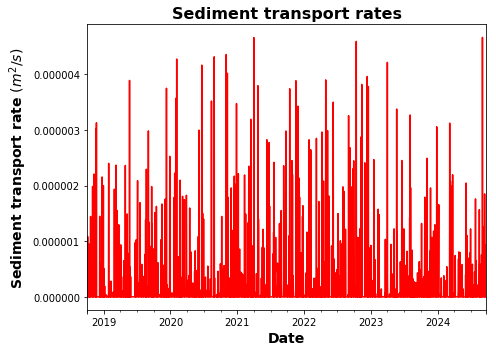

In [10]:
fig2, ax2 = plt.subplots(figsize=(7,5))
df3.plot(y='q_s', ax=ax2, color = 'r', legend=False)
plt.xlabel('Date', fontweight='bold', fontsize=14)
plt.ylabel(r'Sediment transport rate $(m^2/s)$', fontweight='bold', fontsize=14)
plt.title('Sediment transport rates', fontweight='bold', fontsize=16)
plt.tight_layout()
#plt.savefig(r'C:\Users\Amanda\Desktop\Sediment.png', dpi=300)
plt.show()

## Create loop that goes through model time:
1. Create fines storage, $S_{f_0}$, and matrix storage, $S_{m_0}$:  
    &emsp;$S_{f_{0}} = 0$  
    &emsp;$S_{m_0}=S_{m_{f_0}}+S_{m_{g_0}}$  
    &emsp;&emsp;$S_{m_{f_0}}=t_{m_0}\ast f_{m_{f_0}}\ast\left(1-p_{m}\right)$   
    &emsp;&emsp;$S_{m_{c_0}}=t_{m_0}\ast f_{m_{c_0}}\ast\left(1-p_{m}\right)$  


2. Loop through dataframe:
    * Calculate $dS_{f_i}$  
        * Check if available sediment is greater than transport capacity:
            * If *yes*, **condition 1** applies:  
              $q_{s_{out}} = q_s*t_s$  
              $dS_{f_{i}} = u*t_p*L - q_{s_{out}}$     
      
            * If *no*, **condition 2** applies:    
              $q_{s_{out}} = min(u*t_p*L + S_{f_{i-1}}, q_s*t_s)$  
              $dS_{f_i} = u*t_p*L - q_{s_{out}}$  
              
     * Calculate $dS_{m_i}$  
        $dS_{m_i} = dS_{m_{c_i}} + dS_{m_{f_i}} = –(dS_{f_i}+q_{s_{out}})$  
        &emsp;$dS_{m_{c_i}}=-k\ast S_{m_{c_i}}*t_{p_i}$     
        &emsp;$dS_{m_{f_i}}=k\ast S_{m_{c_i}}*t_{p_i}–(dS_{f_i}+q_{s_{out}})$ 
      
      
3. Update the fines storage term and the matrix storage term:  
    $S_{f_{i+1}} = S_{f_{i}} + dS_{f_{i}}$  
    $S_{m_{i+1}} = S_{m_{i}} + dS_{m_{i}}$  
    
    
For simplicity, we'll assume the following:  
    &emsp;$t_{m_0}=0.23$ [m] (https://www.fhwa.dot.gov/construction/pubs/ots15002.pdf, A4 Table 3)   
    &emsp;$f_{m_{f_0}}= 0.275$ [-] (from Palix watershed analysis)  
    &emsp;$f_{m_{c_0}}= 0.725$ [-] (from Palix watershed analysis)  
    &emsp;$p_{m}=0.275$ [-] (Applied Hydrogeology 3rd Ed. by C.W. Fetter, Table 3.4)   


In [11]:
#define constants
t_m = 0.23
f_mf = 0.275
f_mc = 0.725
p_m = 0.275

In [12]:
df_storage = pd.DataFrame()

df_storage['time'] = t
df_storage['day'] = np.divide(t,24).astype('int64')
day0 = datetime(2018, 10, 1)
df_storage.set_index(pd.DatetimeIndex([day0+timedelta(hours=time) for time in df_storage.time]), inplace=True)

df_storage['fines_storage'] = np.zeros(len(df))


df_storage['matrix_storage'] = np.zeros(len(df))
df_storage.matrix_storage.iloc[0] = t_m*(1-p_m)*(f_mf + f_mc)

C:\Users\Amanda\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
sed_avail = u*df.truck_pass*L
sed_cap = df.storm_length*3600*df.q_s
value = (sed_avail-sed_cap)

df_storage['value'] = value
df_storage['condition'] = np.where(df_storage.value > 0, 'Conditon 1', 'Condition 2')

In [14]:
df_storage['dS_fi'] = np.zeros(len(df))
df_storage['dS_mi'] = np.zeros(len(df))
df_storage['qs_out'] = np.zeros(len(df))

for i in range(0, len(df)):
    if df_storage.value[i] < 0:
        if i == 0:
            df_storage.qs_out.iloc[i] = np.minimum(sed_avail[i], sed_cap[i])
            df_storage.dS_fi.iloc[i] = sed_avail[i] - df_storage.qs_out.iloc[i]
        else:
            df_storage.qs_out.iloc[i] = np.minimum(np.abs(sed_avail[i]+df_storage.fines_storage.iloc[i-1]), sed_cap[i])
            df_storage.dS_fi.iloc[i] = sed_avail[i] - df_storage.qs_out.iloc[i]

    else:
        df_storage.qs_out.iloc[i] = sed_cap[i]
        df_storage.dS_fi.iloc[i] = value[i]

    df_storage.dS_mi.iloc[i] = -df_storage.dS_fi.iloc[i] - df_storage.qs_out.iloc[i]
        
    if i == 0:
        df_storage.fines_storage.iloc[i] = df_storage.fines_storage.iloc[i]
        df_storage.matrix_storage.iloc[i] = df_storage.matrix_storage.iloc[i]
    else:
        df_storage.fines_storage.iloc[i] = df_storage.fines_storage.iloc[i-1] + df_storage.dS_fi.iloc[i]
        df_storage.matrix_storage.iloc[i] = df_storage.matrix_storage.iloc[i-1] + df_storage.dS_mi.iloc[i]


df_storage.head()

,time,day,fines_storage,matrix_storage,value,condition,dS_fi,dS_mi,qs_out
2018-10-01 00:00:00.000000,0.000000,0,0.000000e+00,0.166750,-0.000020,Condition 2,0.000000,-0.000000,0.000000
2018-10-02 15:56:04.656292,39.934627,1,8.729785e-06,0.166732,0.000009,Conditon 1,0.000009,-0.000018,0.000010
2018-10-02 23:05:07.666605,47.085463,1,5.082198e-21,0.166622,-0.000719,Condition 2,-0.000009,-0.000110,0.000119
2018-10-05 07:16:20.658723,103.272405,4,5.082198e-21,0.166457,-0.002548,Condition 2,0.000000,-0.000165,0.000165
2018-10-06 22:51:15.360342,142.854267,5,2.694555e-04,0.166146,0.000269,Conditon 1,0.000269,-0.000311,0.000042


In [15]:
df4 = df_storage.resample('D').mean().fillna(method='ffill')
df4['day'] = np.arange(0, len(df4), 1)

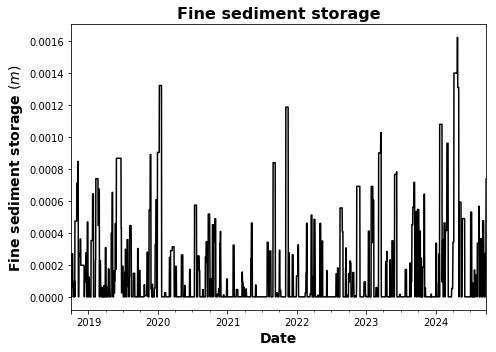

In [16]:
fig3, ax3 = plt.subplots(figsize=(7,5))
df4.plot(y='fines_storage', ax=ax3, color = 'k', legend=False)
plt.xlabel('Date', fontweight='bold', fontsize=14)
plt.ylabel(r'Fine sediment storage $(m)$', fontweight='bold', fontsize=14)
plt.title('Fine sediment storage', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
df5 = df_storage.resample('H').mean().fillna(method='ffill')
df5['hour'] = np.arange(0, len(df5), 1)

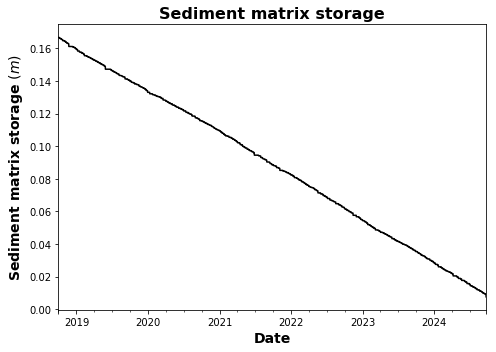

In [18]:
fig4, ax4 = plt.subplots(figsize=(7,5))
df5.plot(y='matrix_storage', ax=ax4, color = 'k', legend=False)
plt.xlabel('Date', fontweight='bold', fontsize=14)
plt.ylabel(r'Sediment matrix storage $(m)$', fontweight='bold', fontsize=14)
plt.title('Sediment matrix storage', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

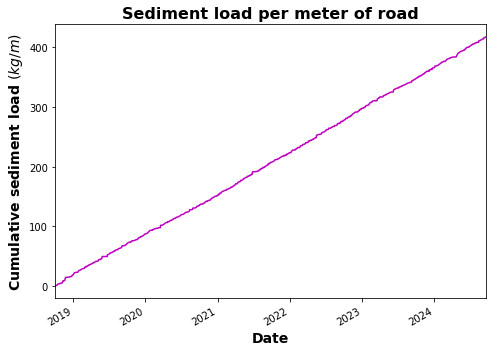

In [19]:
fig5, ax5 = plt.subplots(figsize=(7,5))
sed_cumsum_kg_m = df_storage.qs_out.cumsum()*rho_s
sed_cumsum_kg_m.plot(ax=ax5, color = 'm', legend=False)
plt.xlabel('Date', fontweight='bold', fontsize=14)
plt.ylabel(r'Cumulative sediment load $(kg/m)$', fontweight='bold', fontsize=14)
plt.title('Sediment load per meter of road', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
sed_sum_m2 = df_storage.qs_out.sum()
sed_sum_kg_m = sed_sum_m2*rho_s
sed_sum_kg_m

417.7036673700345